In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Read Data

In [194]:
data=pd.read_csv('application_record.csv')
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [196]:
df=pd.read_csv('credit_record.csv')
df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [197]:
merged_data = pd.merge(data, df, on='ID', how='left')

merged_data


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN,NaN
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN,NaN


# EDA


In [198]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

In [199]:
def describtion(data):
    return data.describe()

In [200]:
describtion(data)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [201]:
describtion(df)

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [202]:
describtion(merged_data)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1179815.0,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,777715.000000
mean,5.429449e+06,4.277560e-01,1.882163e+05,-1.608234e+04,5.876616e+04,1.0,2.224645e-01,2.962507e-01,9.788060e-02,2.203816e+00,-19.373564
std,5.748228e+05,7.381708e-01,1.048445e+05,4.131930e+03,1.373000e+05,0.0,4.159017e-01,4.566031e-01,2.971533e-01,9.035046e-01,14.082208
min,5.008804e+06,0.000000e+00,2.610000e+04,-2.520100e+04,-1.753100e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-60.000000
25%,5.061203e+06,0.000000e+00,1.215000e+05,-1.947300e+04,-3.242000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-29.000000
50%,5.115961e+06,0.000000e+00,1.620000e+05,-1.571100e+04,-1.617000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-17.000000
75%,5.769826e+06,1.000000e+00,2.250000e+05,-1.264600e+04,-4.120000e+02,1.0,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,-8.000000
max,7.999952e+06,1.900000e+01,6.750000e+06,-7.489000e+03,3.652430e+05,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000


In [203]:
def isnull(data):
    return data.isnull().sum()

In [204]:
isnull(data)

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [205]:
isnull(merged_data)

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [206]:
isnull(df)

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# know the distribution of MOnths balance column

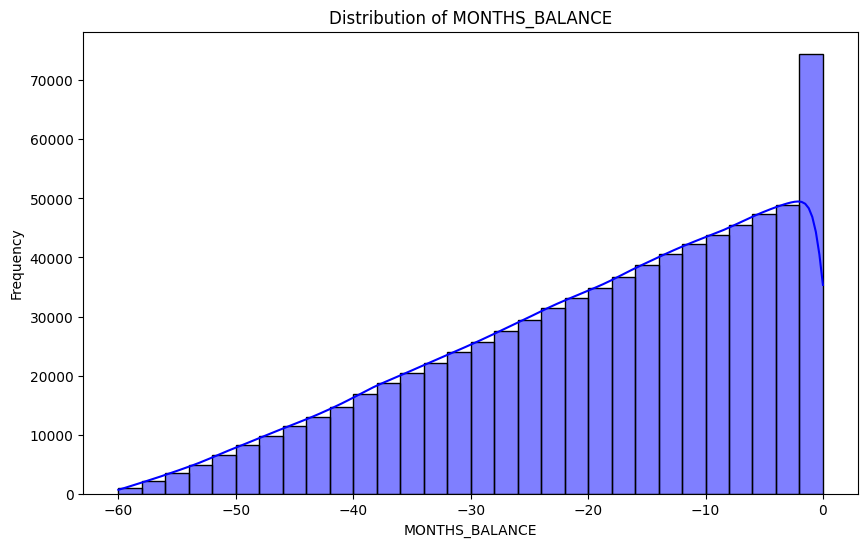

In [207]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['MONTHS_BALANCE'], kde=True, color='blue', bins=30)
plt.title('Distribution of MONTHS_BALANCE')
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Frequency')
plt.show()

# solve null values

I used mode for object data


In [ ]:
OCCUPATION_TYPE=merged_data['OCCUPATION_TYPE'].mode()[0]
merged_data['OCCUPATION_TYPE'].fillna(OCCUPATION_TYPE, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_5792\390037092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['OCCUPATION_TYPE'].fillna(OCCUPATION_TYPE, inplace=True)


In [209]:
STATUS=merged_data['STATUS'].mode()[0]
merged_data['STATUS'].fillna(STATUS, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_5792\2514667390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['STATUS'].fillna(STATUS, inplace=True)


Median for months balance bacause its skewed data

In [210]:
MONTHS_BALANCE=merged_data['MONTHS_BALANCE'].median()
merged_data['MONTHS_BALANCE'].fillna(MONTHS_BALANCE, inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_5792\2334488573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['MONTHS_BALANCE'].fillna(MONTHS_BALANCE, inplace=True)


# solve (-) on some columns

In [211]:
merged_data['DAYS_EMPLOYED']=merged_data['DAYS_EMPLOYED'].abs()

In [212]:
merged_data['DAYS_BIRTH']=merged_data['DAYS_BIRTH'].abs()

# solve object data

In [213]:
def values_counts(merged_data):
    return merged_data.value_counts()

In [214]:
values_counts(merged_data['STATUS'])


STATUS
C    731636
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

In [215]:
merged_data['Target']=merged_data['STATUS'].apply(lambda x: 0 if x=='C' else 1)
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Laborers,2.0,0.0,C,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Laborers,2.0,-1.0,C,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Laborers,2.0,-2.0,C,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Laborers,2.0,-3.0,C,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Laborers,2.0,-4.0,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,Laborers,1.0,-17.0,C,0
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,3007,1,0,0,0,Laborers,1.0,-17.0,C,0
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,372,1,1,0,0,Sales staff,1.0,-17.0,C,0
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,Laborers,2.0,-17.0,C,0


In [216]:
merged_data['Target2']=merged_data['STATUS'].apply(lambda x: 0 if x=='C' and 'x' else 1)
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target,Target2
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Laborers,2.0,0.0,C,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Laborers,2.0,-1.0,C,0,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Laborers,2.0,-2.0,C,0,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Laborers,2.0,-3.0,C,0,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Laborers,2.0,-4.0,C,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,1,0,0,0,Laborers,1.0,-17.0,C,0,0
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,Laborers,1.0,-17.0,C,0,0
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,1,1,0,0,Sales staff,1.0,-17.0,C,0,0
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Laborers,2.0,-17.0,C,0,0


In [217]:
values_counts(merged_data['FLAG_OWN_CAR'])

FLAG_OWN_CAR
N    726200
Y    453615
Name: count, dtype: int64

In [218]:
merged_data['FLAG_OWN_CAR']=merged_data['FLAG_OWN_CAR'].apply(lambda x: 0 if x=='N' else 1)

In [219]:
values_counts(merged_data['NAME_INCOME_TYPE'])

NAME_INCOME_TYPE
Working                 607449
Commercial associate    275652
Pensioner               197733
State servant            98638
Student                    343
Name: count, dtype: int64

In [220]:
mean_name_income_type = merged_data.groupby('NAME_INCOME_TYPE')['Target'].mean()
merged_data['name_incom_type_encoded'] = merged_data['NAME_INCOME_TYPE'].map(mean_name_income_type)

In [221]:
values_counts(merged_data['NAME_FAMILY_STATUS'])

NAME_FAMILY_STATUS
Married                 821399
Single / not married    144777
Civil marriage           93929
Separated                70403
Widow                    49307
Name: count, dtype: int64

In [222]:
mean_name_family_status = merged_data.groupby('NAME_FAMILY_STATUS')['Target'].mean()
merged_data['name_family_status_encoded'] = merged_data['NAME_FAMILY_STATUS'].map(mean_name_family_status)

In [223]:
values_counts(merged_data['NAME_HOUSING_TYPE'])

NAME_HOUSING_TYPE
House / apartment      1058434
With parents             53036
Municipal apartment      37726
Rented apartment         16297
Office apartment          9296
Co-op apartment           5026
Name: count, dtype: int64

In [224]:
mean_name_housing_type = merged_data.groupby('NAME_HOUSING_TYPE')['Target'].mean()
merged_data['name_housing_type_encoding'] = merged_data['NAME_HOUSING_TYPE'].map(mean_name_housing_type)

In [225]:
values_counts(merged_data['OCCUPATION_TYPE'])

OCCUPATION_TYPE
Laborers                 566529
Core staff               116528
Sales staff              107975
Managers                 100213
Drivers                   71630
High skill tech staff     47674
Accountants               41967
Medicine staff            39004
Cooking staff             20837
Security staff            19801
Cleaning staff            16693
Private service staff      9826
Low-skill Laborers         5588
Secretaries                5042
Waiters/barmen staff       4048
HR staff                   2375
Realty agents              2222
IT staff                   1863
Name: count, dtype: int64

In [226]:
mean_occupation_type = merged_data.groupby('OCCUPATION_TYPE')['Target'].mean()
merged_data['occupation_type_encoding'] = merged_data['OCCUPATION_TYPE'].map(mean_occupation_type)

# outlier detect and clean

In [227]:
numeric_columns = merged_data.select_dtypes(include=['number'])

numeric_columns

,ID,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,Target,Target2,name_incom_type_encoded,name_family_status_encoded,name_housing_type_encoding,occupation_type_encoding
0,5008804,1,0,427500.0,12005,4542,1,1,0,0,2.0,0.0,0,0,0.378570,0.364499,0.397006,0.373365
1,5008804,1,0,427500.0,12005,4542,1,1,0,0,2.0,-1.0,0,0,0.378570,0.364499,0.397006,0.373365
2,5008804,1,0,427500.0,12005,4542,1,1,0,0,2.0,-2.0,0,0,0.378570,0.364499,0.397006,0.373365
3,5008804,1,0,427500.0,12005,4542,1,1,0,0,2.0,-3.0,0,0,0.378570,0.364499,0.397006,0.373365
4,5008804,1,0,427500.0,12005,4542,1,1,0,0,2.0,-4.0,0,0,0.378570,0.364499,0.397006,0.373365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,0,0,135000.0,22717,365243,1,0,0,0,1.0,-17.0,0,0,0.369372,0.374672,0.378557,0.373365
1179811,6840222,0,0,103500.0,15939,3007,1,0,0,0,1.0,-17.0,0,0,0.378570,0.368332,0.378557,0.373365
1179812,6841878,0,0,54000.0,8169,372,1,1,0,0,1.0,-17.0,0,0,0.388497,0.368332,0.390867,0.374976
1179813,6842765,0,0,72000.0,21673,365243,1,0,0,0,2.0,-17.0,0,0,0.369372,0.384143,0.378557,0.373365


In [228]:
def detect_outliers_iqr(df):
    outliers_indices = []
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
            outliers_indices.extend(outliers)
    return list(set(outliers_indices))

# Detect outliers
outliers_indices = detect_outliers_iqr(numeric_columns)
print(f'Number of outliers detected: {len(outliers_indices)}')

Number of outliers detected: 733944


In [229]:
data_cleaned = merged_data.drop(outliers_indices).reset_index(drop=True)


# Preprocessing data

In [230]:
features=['FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'name_incom_type_encoded', 'name_family_status_encoded', 'name_housing_type_encoding', 'occupation_type_encoding']
X=data_cleaned[features]
y=data_cleaned['Target']
y=np.reshape(y,(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
X_train.shape

(356696, 8)

In [241]:
scler=MinMaxScaler()
X_train_scler=scler.fit_transform(X_train)
X_test_scler=scler.transform(X_test)
X_train_scler.shape

(356696, 8)

# build model

In [242]:
models={
    "logistic_regression":LogisticRegression(),
    "xgb":xgb.XGBClassifier(),

    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),

    
}

In [243]:
trained_models={}
for name,model in models.items():
    print(f"training model {name}")
    model.fit(X_train_scler,y_train)
    trained_models[name]=model
    print(model.score(X_train_scler,y_train))
    print(model.score(X_test_scler,y_test))

training model logistic_regression


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6575459214569269
0.6573815531258761
training model xgb
0.7407904770448785
0.7369217830109336
training model DecisionTreeClassifier
0.8293588938479826
0.8221138211382114
training model RandomForestClassifier


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8293504833247359
0.8233473507148864
training model GradientBoostingClassifier


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6621857267813488
0.6613400616764789
training model KNeighborsClassifier


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8038665978872765
0.7977123633305299


# evaluate data

In [244]:
for name,model in trained_models.items():
    print(f"Evaluating {name}")
    y_pred=model.predict(X_test_scler)

    print(f"classification report for {name}")
    print(classification_report(y_test,y_pred))
    
    print(f"confusion  matrix  for {name}")
    print(confusion_matrix(y_test,y_pred))

Evaluating logistic_regression
classification report for logistic_regression
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     58622
           1       0.00      0.00      0.00     30553

    accuracy                           0.66     89175
   macro avg       0.33      0.50      0.40     89175
weighted avg       0.43      0.66      0.52     89175

confusion  matrix  for logistic_regression
[[58622     0]
 [30553     0]]
Evaluating xgb
classification report for xgb


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     58622
           1       0.77      0.33      0.46     30553

    accuracy                           0.74     89175
   macro avg       0.75      0.64      0.64     89175
weighted avg       0.74      0.74      0.70     89175

confusion  matrix  for xgb
[[55595  3027]
 [20433 10120]]
Evaluating DecisionTreeClassifier
classification report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     58622
           1       0.75      0.72      0.74     30553

    accuracy                           0.82     89175
   macro avg       0.80      0.80      0.80     89175
weighted avg       0.82      0.82      0.82     89175

confusion  matrix  for DecisionTreeClassifier
[[51174  7448]
 [ 8415 22138]]
Evaluating RandomForestClassifier
classification report for RandomForestClassifier
              precision    recall  f1-score  

# choose the best model

In [245]:
cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)
print(f"train{cls.score(X_train,y_train)}")
print(f"test{cls.score(X_test,y_test)}")

train0.8293588938479826
test0.8222147462853939


In [246]:
y_pred=cls.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[51183  7439]
 [ 8415 22138]]
